#🎯 Giới thiệu Đọc File CSV

In [96]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score

In [1]:
import pandas as pd
df = pd.read_csv('19-WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#Giới thiệu các thuôc tính , kiểu dữ liệu ,số dòng ,số cột

In [2]:
# Giới thiệu tập dữ liệu
num_rows = df.shape[0]  # Số dòng
num_cols = df.shape[1]  # Số cột

print("Giới thiệu tập dữ liệu:")
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")
print("Các thuộc tính và kiểu dữ liệu:")

for column in df.columns:
    dtype = df[column].dtype
    print(f"{column}: {dtype}")

Giới thiệu tập dữ liệu:
Số dòng: 1143
Số cột: 13
Các thuộc tính và kiểu dữ liệu:
fixed acidity: float64
volatile acidity: float64
citric acid: float64
residual sugar: float64
chlorides: float64
free sulfur dioxide: float64
total sulfur dioxide: float64
density: float64
pH: float64
sulphates: float64
alcohol: float64
quality: int64
Id: int64


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
df.shape

(1143, 13)

In [5]:
#kiểm tra dữ liệu có bị thiếu không?
df2_missing = df.isnull().sum()
df2_missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
#kiểm tra dữ liệu có chứa giá trị NaN. không ?
df2_Nan = df.isna().sum()
df2_missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Kết Luận:


*  Ở tập dữ liệu thứ 2 có kích thước lớn hơn so với tập dữ liệu thứ nhất. Dữ liệu có 1143 dong ,13 cột dữ liệu.
*   
Cũng không có giá trị bị thiếu và Cũng không chứa giá trị NaN




In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


#Mục đích chính có thể là phân tích dữ liệu để hiểu và tìm ra mối quan hệ giữa các thuộc tính của rượu và chất lượng của chúng.

Yêu cầu: Các yêu cầu cụ thể có thể bao gồm:


1.   Phân tích tương quan: Kiểm tra mối quan hệ giữa các thuộc tính như fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol với chất lượng của rượu (quality).
2.   Mô hình hóa: Xây dựng mô hình để dự đoán chất lượng của rượu dựa trên các thuộc tính khác.
3.   Đặc trưng quan trọng: Xác định những thuộc tính quan trọng nhất đóng vai trò quan trọng trong việc ảnh hưởng đến chất lượng của rượu.
4. Khám phá dữ liệu: Tìm hiểu các đặc điểm và phân phối của các thuộc tính trong tập dữ liệu.






#Giả thuyết cần thiết trước khi thực hiện phân tích tiếp theo có thể bao gồm:


1.   Giả thuyết về mối quan hệ: Có thể giả định rằng có một mối quan hệ giữa các thuộc tính của rượu và chất lượng của chúng. Ví dụ: Có thể giả định rằng nồng độ cồn (alcohol) có thể ảnh hưởng đến chất lượng của rượu.
2. Giả thuyết về phân phối: Có thể giả định rằng các thuộc tính trong tập dữ liệu tuân theo phân phối chuẩn hoặc phân phối khác nào đó.

3. Giả thuyết về sự độc lập: Có thể giả định rằng các thuộc tính trong tập dữ liệu là độc lập với nhau, tức là không có sự tương quan mạnh giữa chúng.








#🎯Thực hiện quản lý dữ liệu: Làm sạch, Tạo biến phụ, Mã hóa lại, …

In [8]:
# Kiểm tra dữ liệu thiếu
missing_values = df.isnull().sum()
print("Dữ liệu thiếu:\n", missing_values)

Dữ liệu thiếu:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [9]:
# Xóa các dòng có giá trị trống
data = df.dropna()

In [10]:
# Kiểm tra giá trị không hợp lệ
invalid_values = data[(data['free sulfur dioxide'] < 0) | (data['total sulfur dioxide'] < 0)]
print("\nDanh sách các bản ghi có giá trị không hợp lệ:")
print(invalid_values)


Danh sách các bản ghi có giá trị không hợp lệ:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []


In [11]:
# Kiểm tra trùng lặp
duplicate_records = data[data.duplicated()]
print("\nDanh sách các bản ghi bị trùng lặp:")
print(duplicate_records) #


Danh sách các bản ghi bị trùng lặp:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, Id]
Index: []


Kiểm tra outliers


In [12]:
import numpy as np

def detect_outliers_IQR(data):
   #Calculate the Q1:
   Q1 = np.percentile(data, 25)
   #Calculate the Q3:
   Q3 = np.percentile(data, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(data >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(data <= (Q1-1.5*IQR))
   #Outliers
   outliers = data[((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
   return outliers, upper, lower

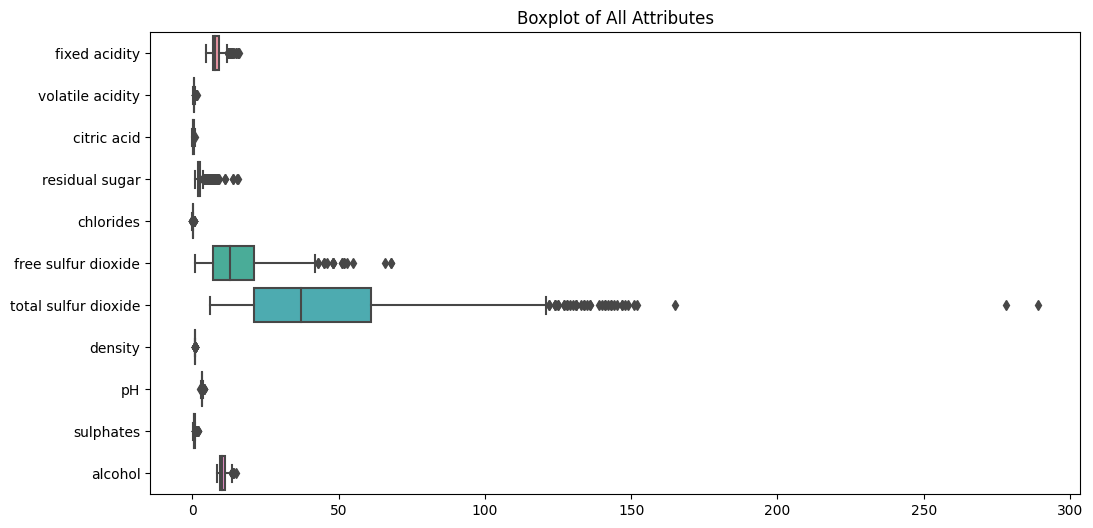

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
data2=data.drop(columns=['quality','Id'])
# Loại bỏ các cột không tồn tại
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ
sns.boxplot(data=data2, orient="h")  # "orient" là "h" để vẽ Boxplot ngang, "v" để vẽ Boxplot đứng
plt.title('Boxplot of All Attributes')
plt.show()

Xem xét thuốc tính total sulfur dioxide

In [14]:
total_sulfur_dioxide_mean = data2['total sulfur dioxide'].mean()
print("total_sulfur_dioxide_mean:", total_sulfur_dioxide_mean)

total_sulfur_dioxide_median = data2['total sulfur dioxide'].median()
print("total_sulfur_dioxide_mean:", total_sulfur_dioxide_median)

total_sulfur_dioxide_mode = data2['total sulfur dioxide'].mode().values[0]
print("total_sulfur_dioxide_mode:", total_sulfur_dioxide_mode)

total_sulfur_dioxide_mean: 45.91469816272966
total_sulfur_dioxide_mean: 37.0
total_sulfur_dioxide_mode: 28.0


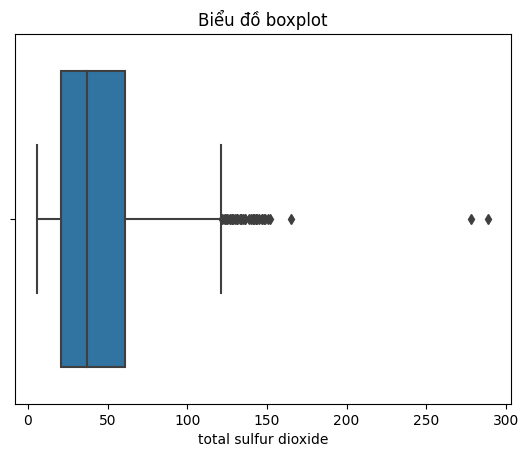

In [15]:
# Vẽ biểu đồ boxplot cho một biến số
sns.boxplot(x='total sulfur dioxide', data=data)
plt.title('Biểu đồ boxplot')
plt.show()

In [16]:
outliers, upper, lower = detect_outliers_IQR(data2['total sulfur dioxide'])

print("số lượng outliers: "+ str(len(outliers)))

print("giá trị max outliers: "+ str(outliers.max()))

print("giá trị min outliers: "+ str(outliers.min()))

print("tỉ lệ outliers: "+ str(len(outliers)/len(df) * 100))

số lượng outliers: 40
giá trị max outliers: 289.0
giá trị min outliers: 122.0
tỉ lệ outliers: 3.499562554680665


---> Tỉ lệ phần trăm outliers của `total sulfur dioxide` quá nhỏ nên bỏ qua các ngoại lê này

Xem xét thuốc tính `free sulfur dioxide`

In [17]:
free_sulfur_dioxide_mean = data2['free sulfur dioxide'].mean()
print("total_sulfur_dioxide_mean:", free_sulfur_dioxide_mean)

free_sulfur_dioxide_median = data2['free sulfur dioxide'].median()
print("total_sulfur_dioxide_mean:", free_sulfur_dioxide_median)

free_sulfur_dioxide_mode = data2['free sulfur dioxide'].mode().values[0]
print("total_sulfur_dioxide_mode:", free_sulfur_dioxide_mode)

total_sulfur_dioxide_mean: 15.615485564304462
total_sulfur_dioxide_mean: 13.0
total_sulfur_dioxide_mode: 6.0


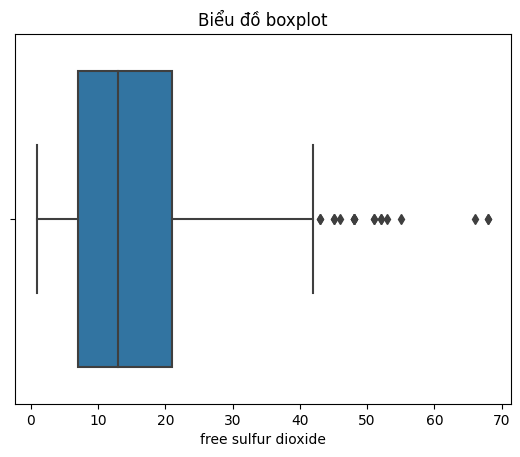

In [18]:
# Vẽ biểu đồ boxplot cho một biến số
sns.boxplot(x='free sulfur dioxide', data=data)
plt.title('Biểu đồ boxplot')
plt.show()

In [19]:
outliers, upper, lower = detect_outliers_IQR(data2['free sulfur dioxide'])

print("số lượng outliers: "+ str(len(outliers)))

print("giá trị max outliers: "+ str(outliers.max()))

print("giá trị min outliers: "+ str(outliers.min()))

print("tỉ lệ outliers: "+ str(len(outliers)/len(df) * 100))

số lượng outliers: 18
giá trị max outliers: 68.0
giá trị min outliers: 43.0
tỉ lệ outliers: 1.574803149606299


------>`Bộ dữ liệu không cần làm sạch`

In [20]:
from sklearn.preprocessing import LabelEncoder
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()
# Tạo biến phụ từ cột trong DataFrame
df['new_variable'] = df['fixed acidity'] + df['volatile acidity']

# Hiển thị DataFrame để kiểm tra kết quả
print(df[['fixed acidity', 'new_variable']].head())

   fixed acidity  new_variable
0            7.4          8.10
1            7.8          8.68
2            7.8          8.56
3           11.2         11.48
4            7.4          8.10


In [21]:
print(df[['fixed acidity', 'new_variable']].drop_duplicates().sort_values(by='new_variable'))

     fixed acidity  new_variable
32             4.6         5.120
589            4.9         5.320
898            5.0         5.380
787            5.0         5.400
419            5.0         5.420
..             ...           ...
170           15.0        15.210
397           15.5        16.145
399           15.6        16.245
462           15.9        16.260
311           15.6        16.285

[903 rows x 2 columns]


In [22]:
df.to_csv('19-WineQT_3.csv')

In [23]:
#thực hiện xóa bỏ các thuộc tính không liên quan để tính toán và vẽ biểu đồ tương quan
correlation_matrix = data.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

#🎯Xét mối quan hệ giữa các biến (các mối quan hệ này có liên quan đến mục đích của khách hàng). Nêu rõ lý do mình cần xét các mối quan hệ này.

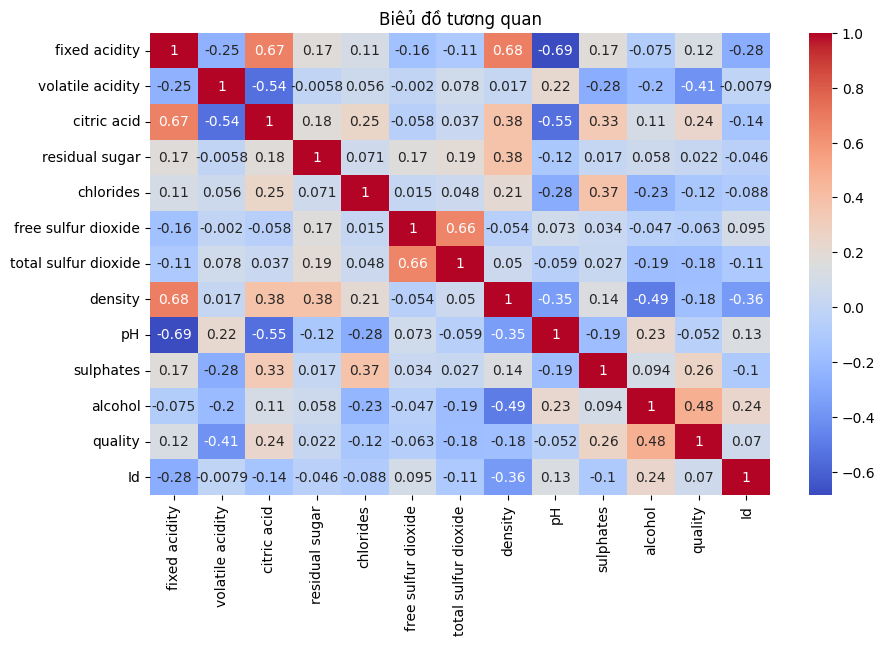

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title('Biêủ đồ tương quan')
plt.show()

==> Cho thấy alcohol với sunfat , citric acid có mối quan hệ với chất lượng (quality)

Thực hiện vẽ biểu đồ cho thấy được sự phân tán giữa các biến

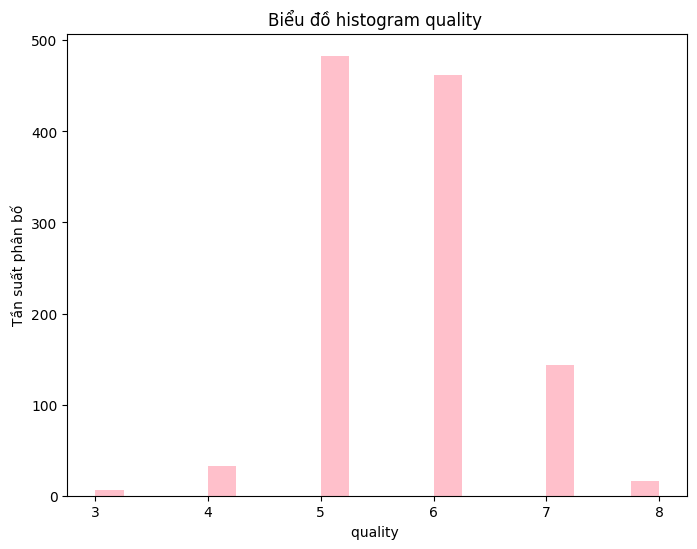

In [25]:
# Vẽ biểu đồ histogram cho credit_card
plt.figure(figsize=(8, 6))
plt.hist(data['quality'], bins=20, color ='pink')
plt.xlabel('quality ')
plt.ylabel('Tần suất phân bố')
plt.title('Biểu đồ histogram quality ')
plt.show()

<Axes: >

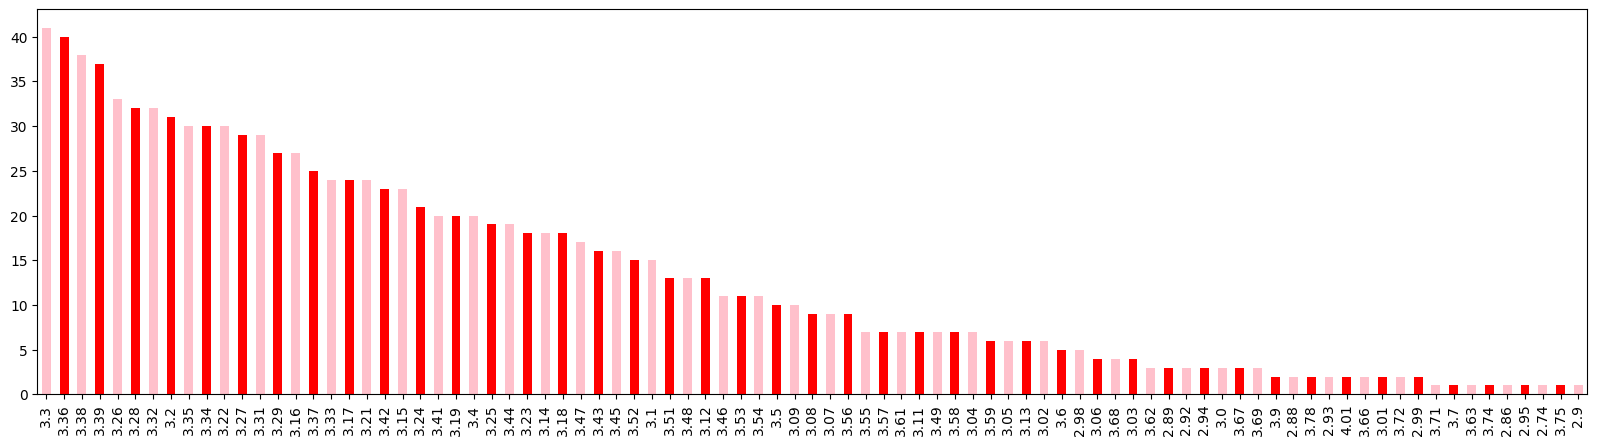

In [26]:
#số lượng phân bố giao dịch dựa trên PH
data['pH'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

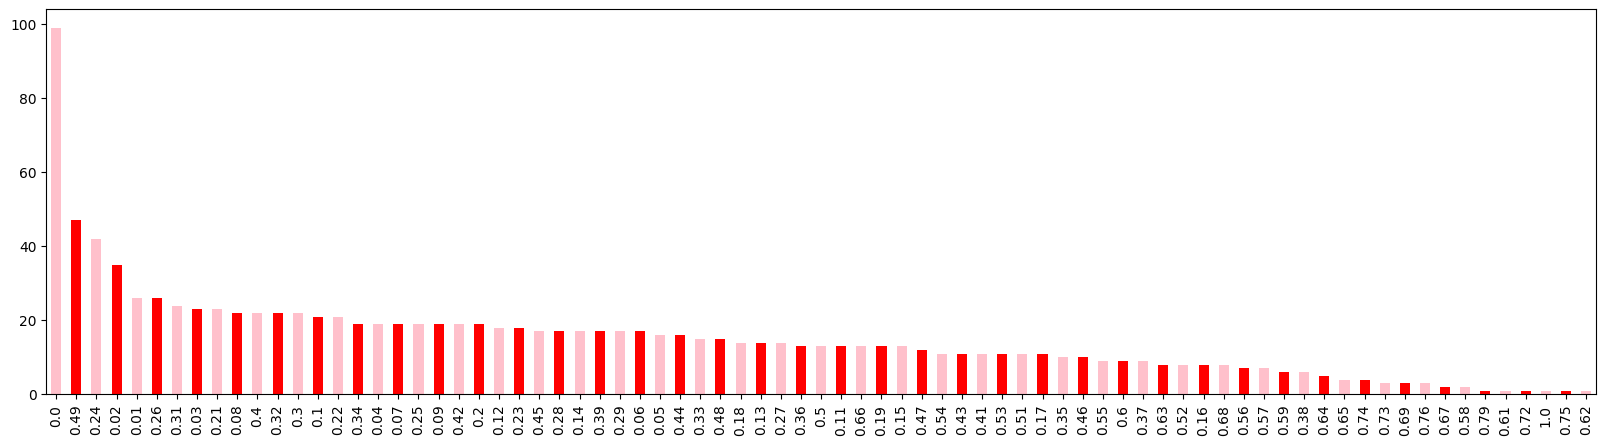

In [27]:
#số lượng phân bố giao dịch dựa trên Axit
data['citric acid'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

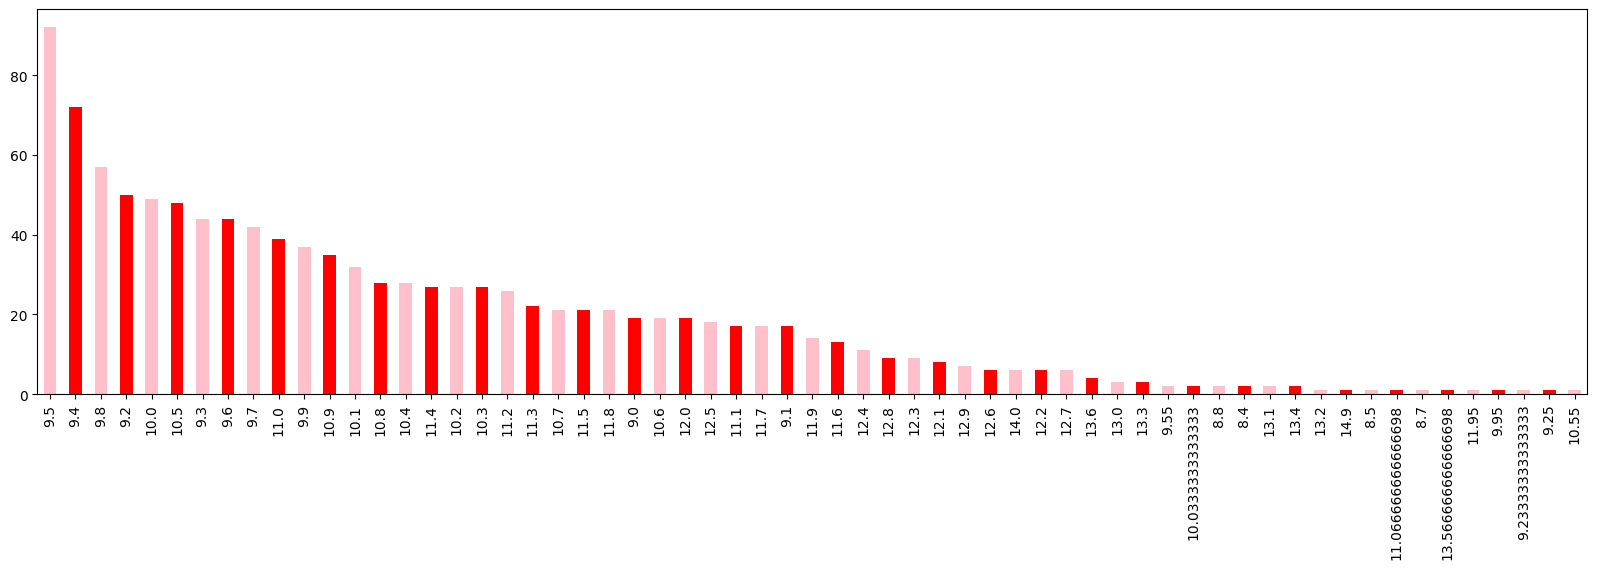

In [28]:
#số lượng phân bố giao dịch dựa trên Nồng độ Cồn
data['alcohol'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

Từ 3 đồ thị này thì ta suy ra PH, nồng độ cồn , axit cho thấy tập trung ở 3.3(pH) nó tập trung phân bố khá đều so với 2 biến sau , 0.0(citric acid) ,9.5(alcohol) 2 biến này tập trung khá nhiều về 0.0 và 9.5.

<Axes: >

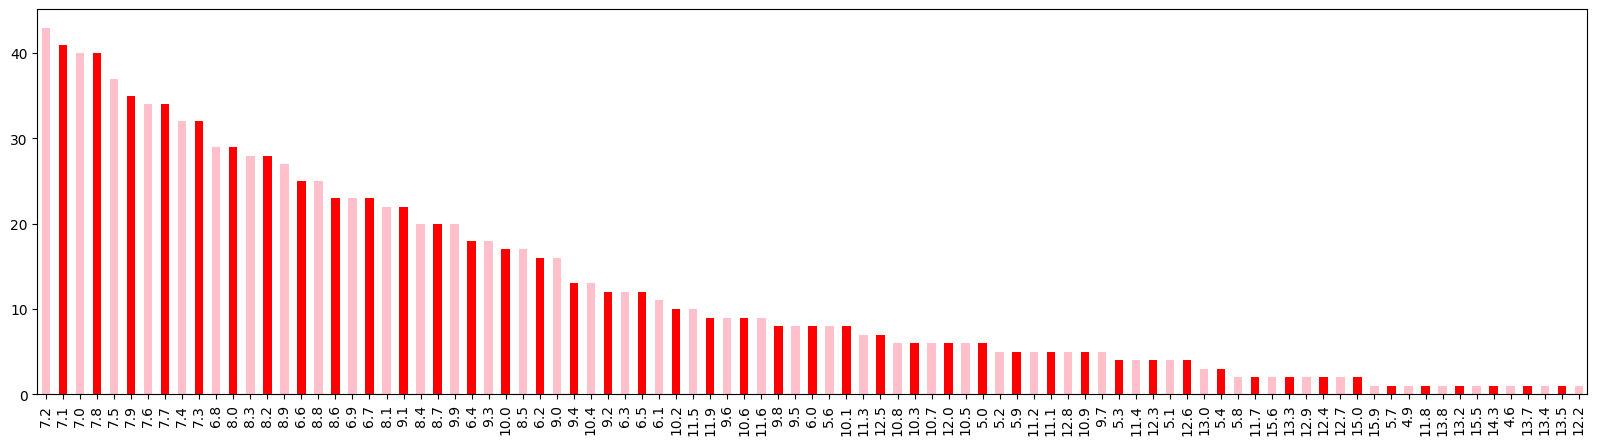

In [29]:
#số lượng phân bố giao dịch dựa trên sửa lỗi axit
data['fixed acidity'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

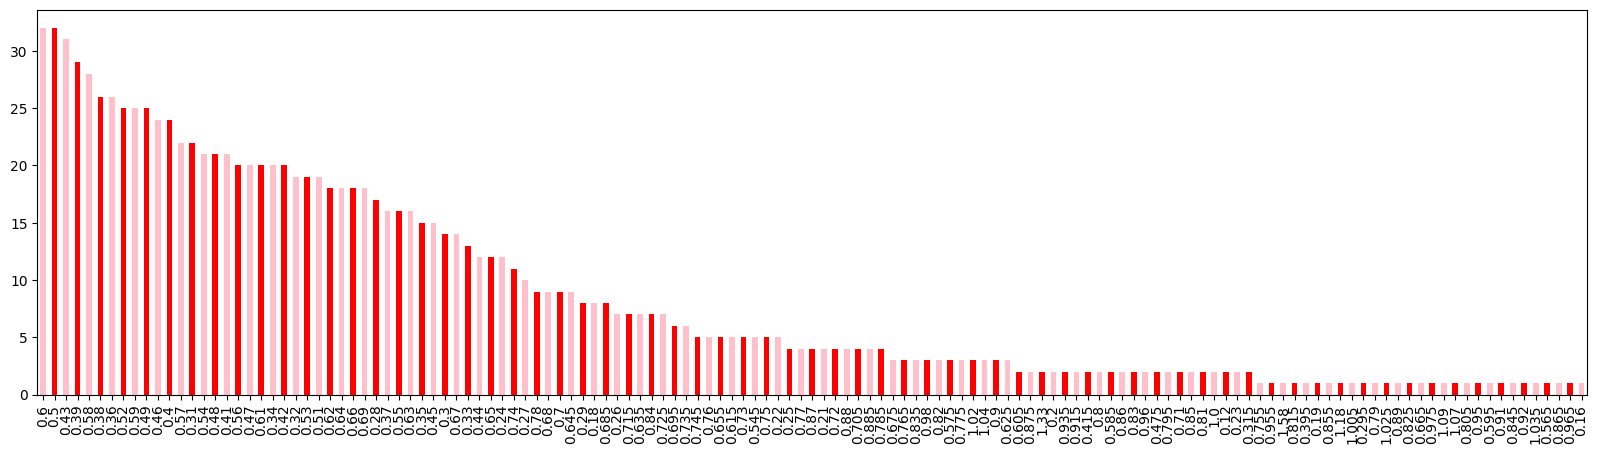

In [30]:
#số lượng phân bố giao dịch dựa trên Độ axit dễ bay hơi
data['volatile acidity'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

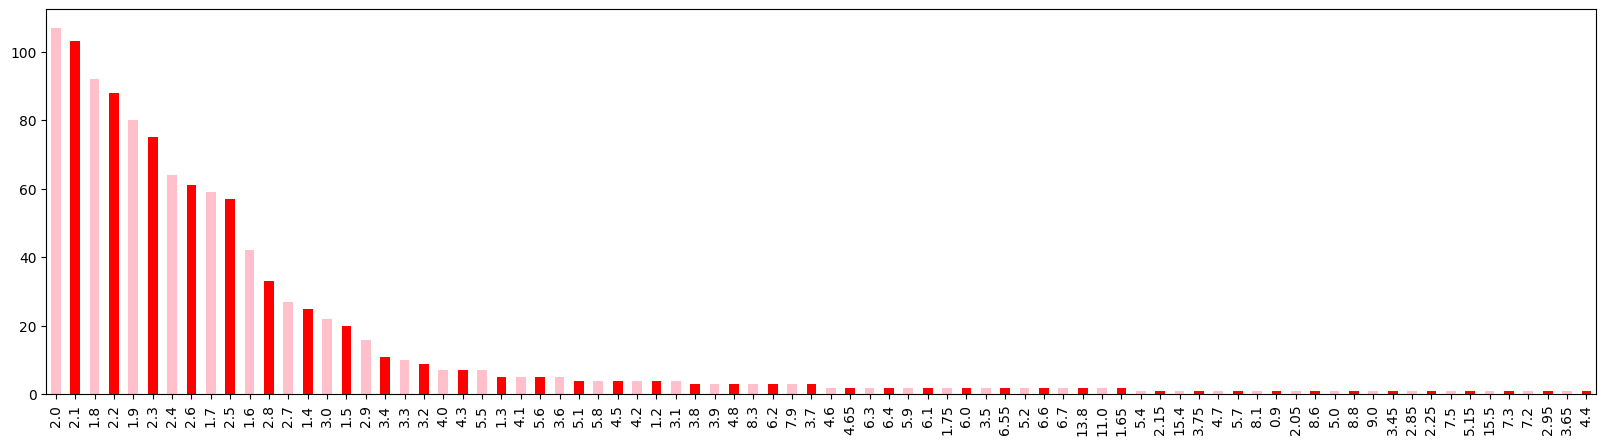

In [31]:
#số lượng phân bố giao dịch dựa trên Đường còn lại
data['residual sugar'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

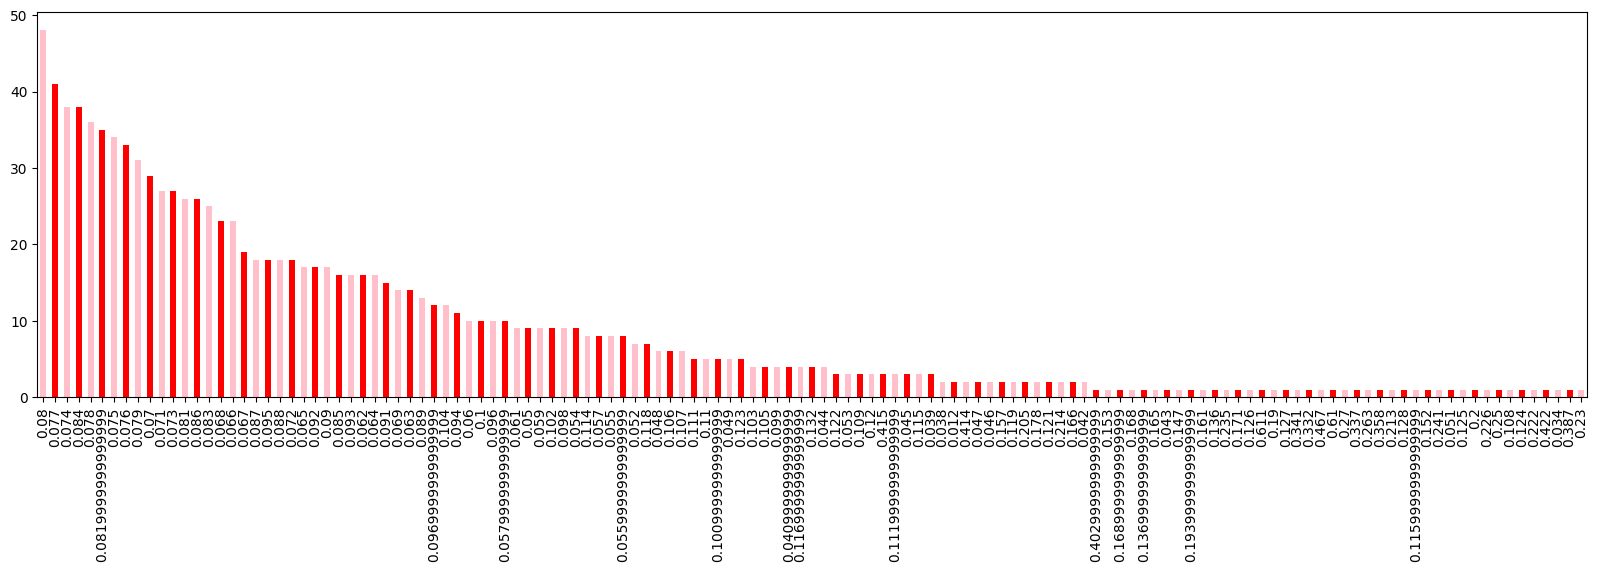

In [32]:
#số lượng phân bố giao dịch dựa trên clorua
data['chlorides'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

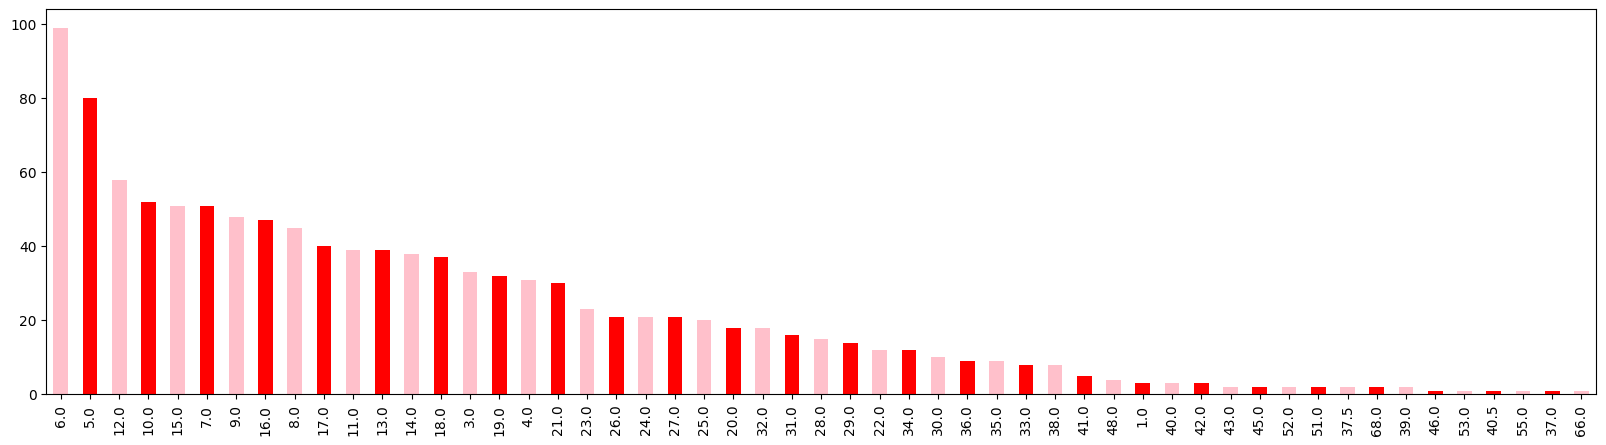

In [33]:
#số lượng phân bố giao dịch dựa trên Lưu huỳnh Dioxide
data['free sulfur dioxide'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

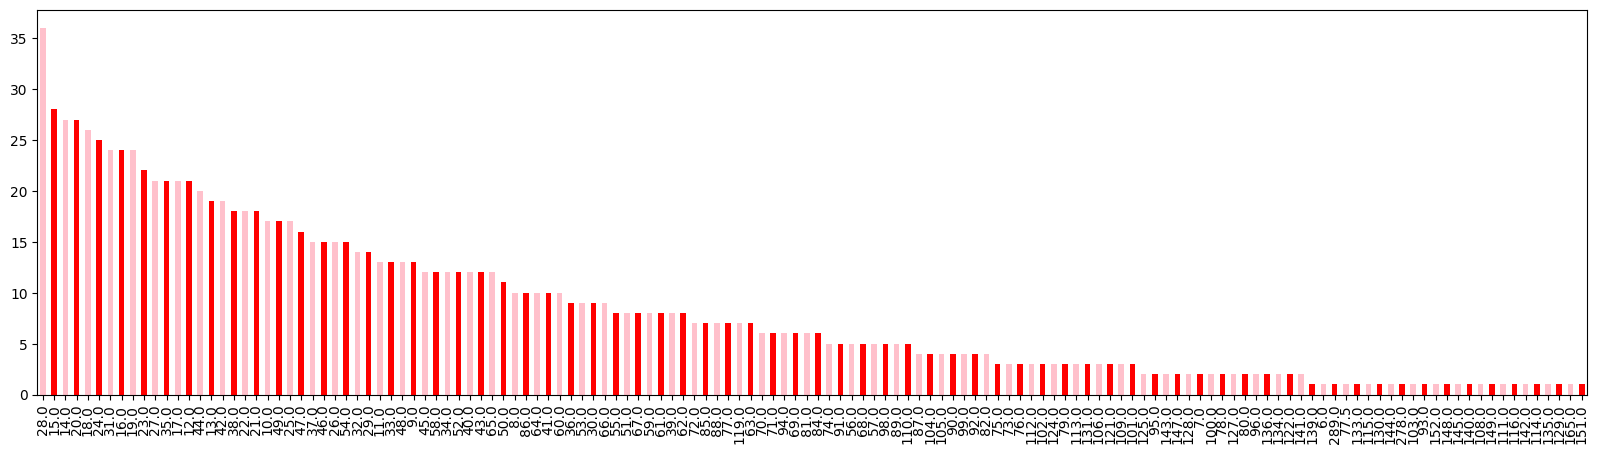

In [34]:
#số lượng phân bố giao dịch dựa trên Tổng lưu huỳnh dioxide
data['total sulfur dioxide'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

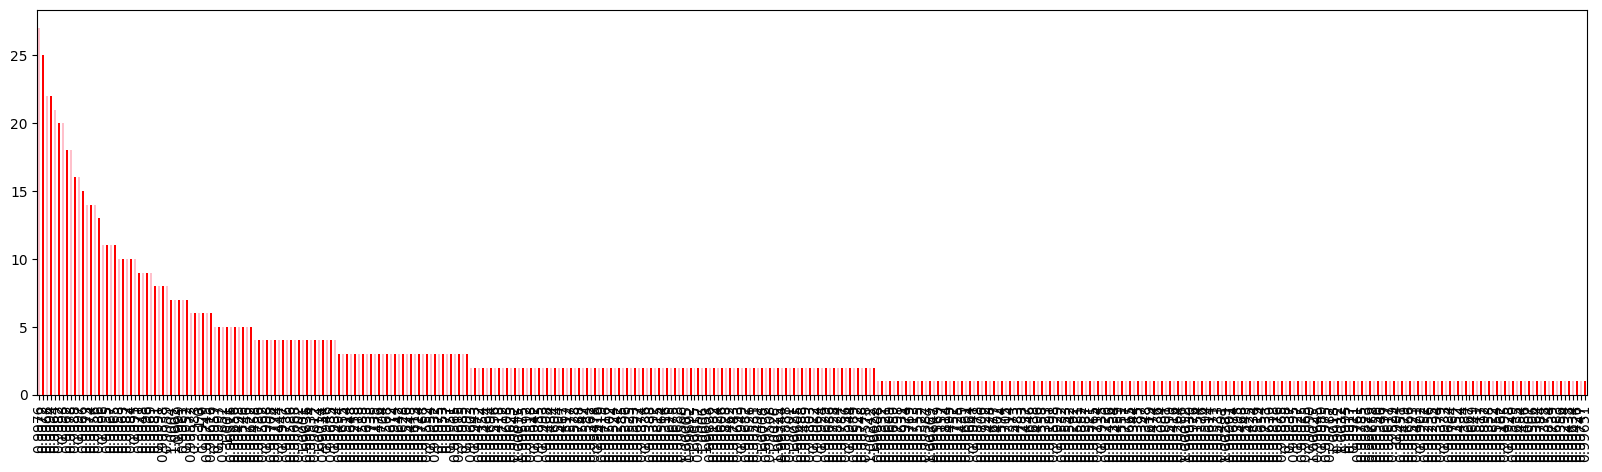

In [35]:
#số lượng phân bố giao dịch dựa trên Mật độ
data['density'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

<Axes: >

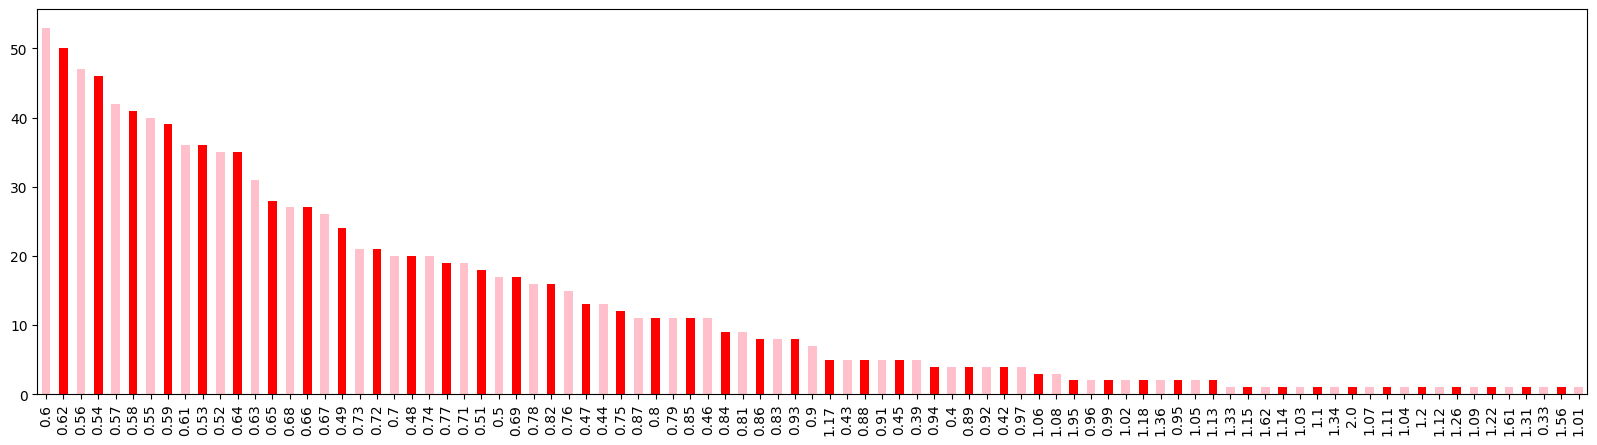

In [36]:
#số lượng phân bố giao dịch dựa trên axit sunfat
data['sulphates'].value_counts().plot(kind='bar', figsize= (20,5),color=['pink', 'red'])

Mối Quan hệ của alcohol và Quality

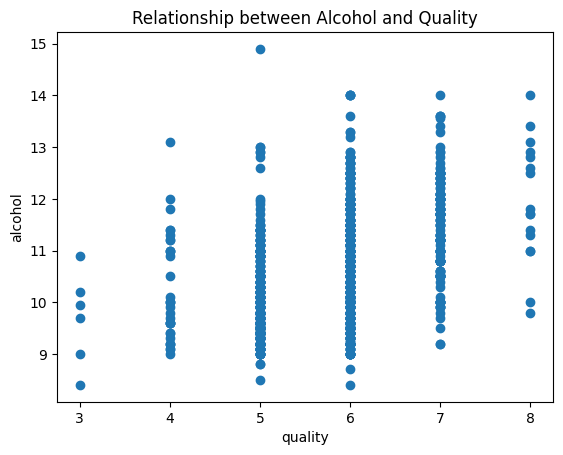

Correlation between quality and alcohol: 0.4848662118085115


In [37]:
# Lấy các cột "alcohol" và "quality" từ dữ liệu
alcohol = data['quality']
quality = data['alcohol']

# Vẽ mô hình phân tán
plt.scatter(alcohol, quality)
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Relationship between Alcohol and Quality')
plt.show()

# Tính hệ số tương quan
correlation = data['quality'].corr(data['alcohol'])
print(f'Correlation between quality and alcohol: {correlation}')

In [38]:
# Vẽ biểu đồ phân tán đa biến
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#🎯kiểm định mối quan hệ của các thuột tính đối với chất lượng rượu

Mối quan hệ giữa axid( citric acid) và chất lượng rượu (quality)

In [52]:

# Thực hiện kiểm định tương quan
correlation, p_value = pearsonr(data['quality'], data['citric acid'])

# In kết quả
print(f'Correlation between quality and citric acid: {correlation}')
print(f'p-value: {p_value}')
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")

Correlation between quality and citric acid: 0.24082083714719352
p-value: 1.5239885255646097e-16
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


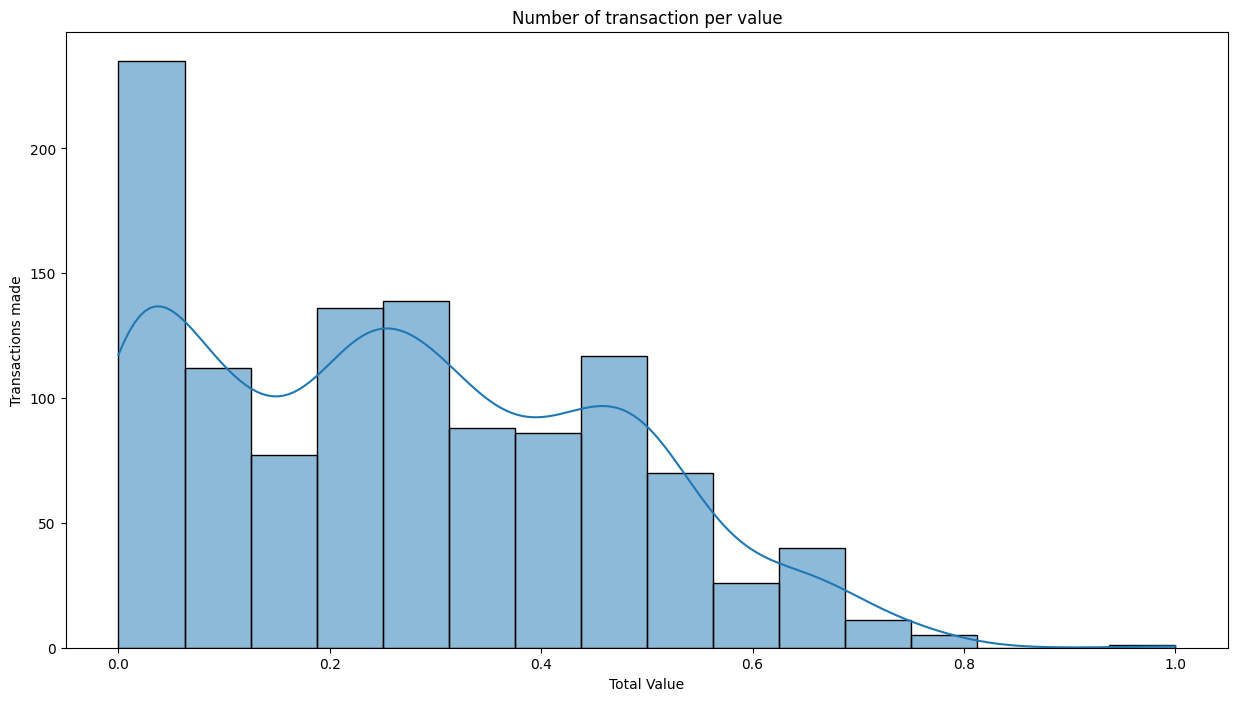

In [51]:
plt.figure(figsize=(15,8))

sns.histplot(data['citric acid'], kde=True)
plt.title('Number of transaction per value')
plt.ylabel('Transactions made')
plt.xlabel('Total Value')

plt.show()

 Mối quan hệ giữa ( sulphates) và chất lượng rượu (quality)

In [53]:

# Thực hiện kiểm định tương quan
correlation, p_value = pearsonr(data['quality'], data['sulphates'])

# In kết quả
print(f'Correlation between quality and sulphates: {correlation}')
print(f'p-value: {p_value}')
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")

Correlation between quality and sulphates: 0.25771025993062235
p-value: 8.506994295974213e-19
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


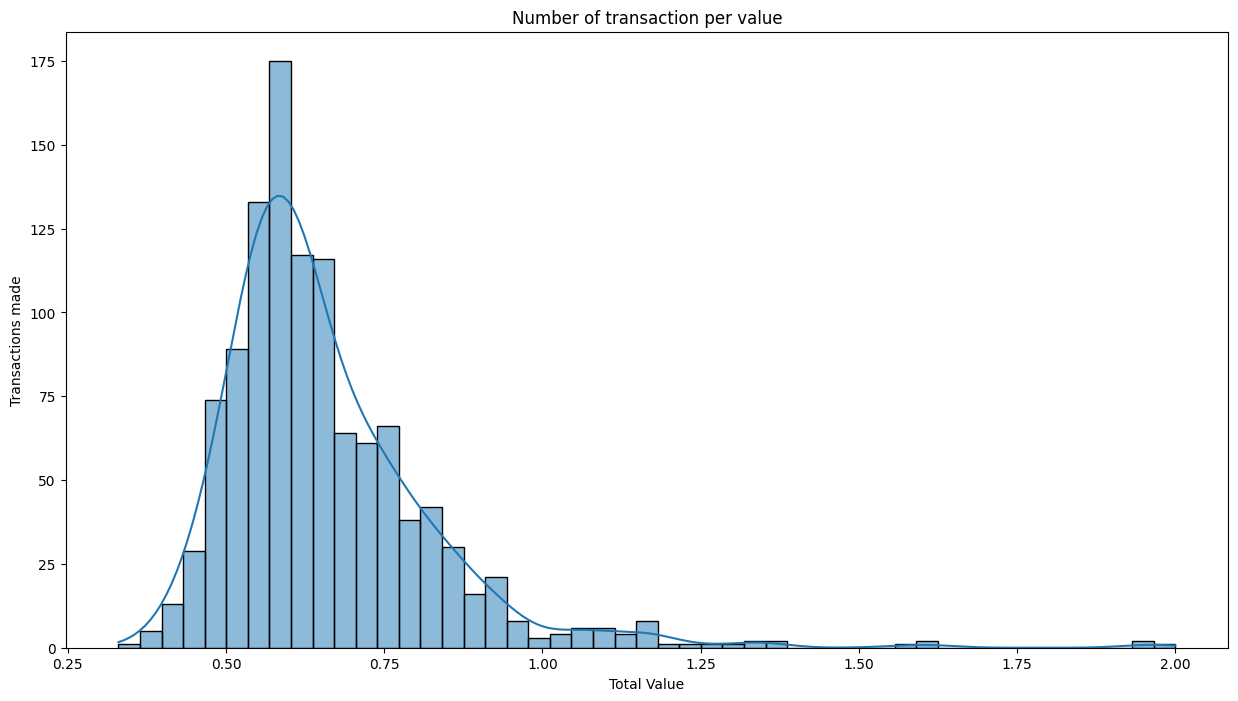

In [55]:
plt.figure(figsize=(15,8))

sns.histplot(data['sulphates'], kde=True)
plt.title('Number of transaction per value')
plt.ylabel('Transactions made')
plt.xlabel('Total Value')

plt.show()

In [57]:
# Thực hiện kiểm định tương quan
correlation, p_value = pearsonr(data['quality'], data['alcohol'])

# In kết quả
print(f'Correlation between quality and alcohol : {correlation}')
print(f'p-value: {p_value}')
alpha = 0.05  # Mức ý nghĩa
if p_value < alpha:
    print("Có mối quan hệ tuyến tính đáng kể giữa hai biến.")
else:
    print("Không có mối quan hệ tuyến tính đáng kể giữa hai biến.")

Correlation between quality and alcohol : 0.4848662118085118
p-value: 1.9246528150999905e-68
Có mối quan hệ tuyến tính đáng kể giữa hai biến.


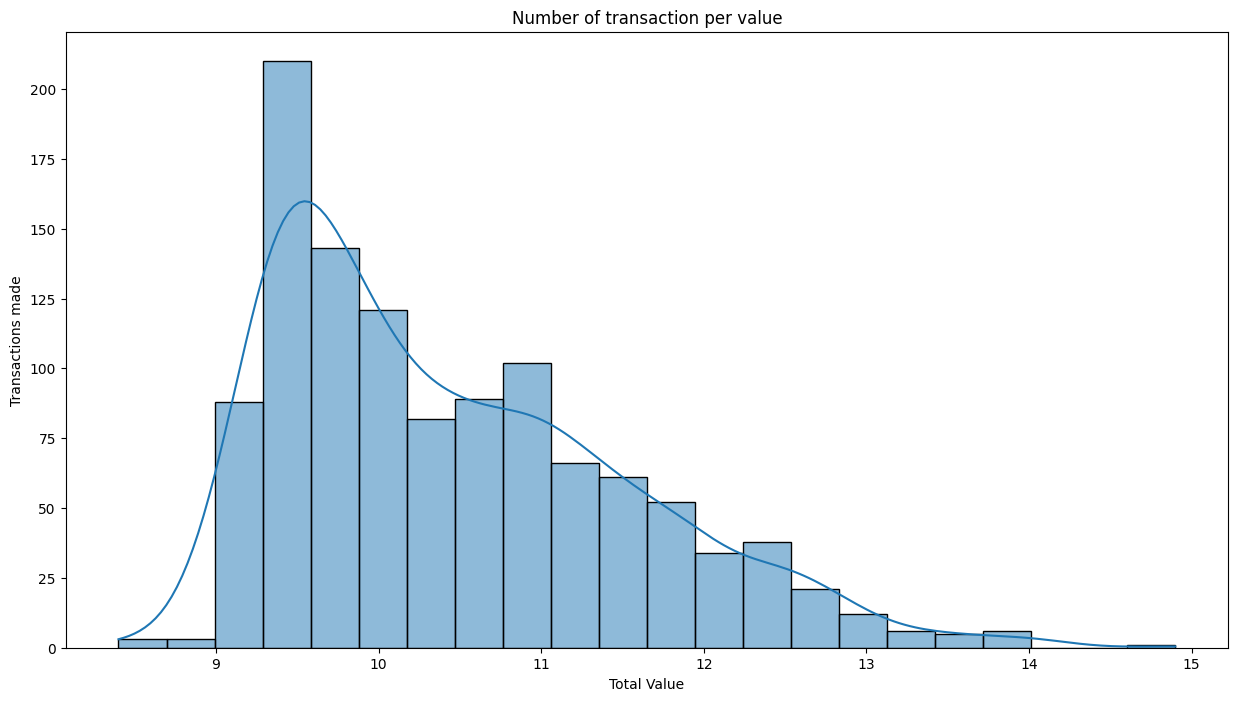

In [58]:
plt.figure(figsize=(15,8))

sns.histplot(data['alcohol'], kde=True)
plt.title('Number of transaction per value')
plt.ylabel('Transactions made')
plt.xlabel('Total Value')

plt.show()

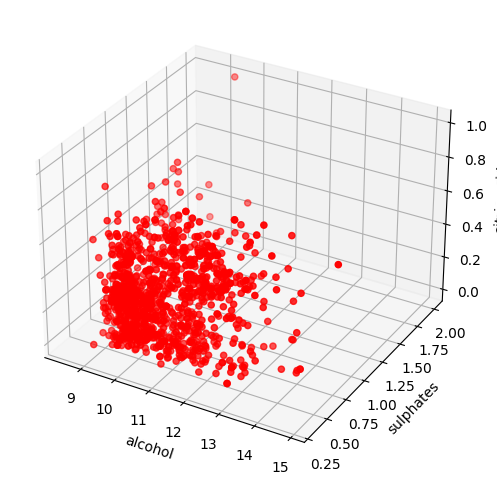

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Tạo biểu đồ Scatter 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Dữ liệu
x = df['alcohol']
y = df['sulphates']
z = df['citric acid']

# Vẽ Scatter 3D
ax.scatter(x, y, z, c='r', marker='o')

# Đặt tên cho trục
ax.set_xlabel('alcohol')
ax.set_ylabel('sulphates')
ax.set_zlabel('citric acid')

# Hiển thị biểu đồ
plt.show()

==>Có một mối tương quan rõ ràng giữa nồng độ cồn (alcohol), sunfat (sulphates) và axit citric (citric acid) trong rượu.
Nồng độ cồn và sunfat có xu hướng tăng khi nồng độ axit citric tăng.
Tồn tại một nhóm nhỏ các mẫu rượu  có nồng độ cồn và sunfat cao hơn so với các mẫu khác.
Biểu đồ cho thấy một sự phân bố không đồng đều của các mẫu rượu  trong không gian ba chiều.

# 🎯Xây dựng mô hình hồi quy

Xây dựng mô hình hồi quy của citric acid và quality  

In [63]:
# Dữ liệu mẫu cho hai biến #
citric_acid = np.array(data['citric acid']).reshape(-1, 1)
quality_1 = np.array(data['quality'])

In [65]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(citric_acid, quality_1 , test_size=0.2, random_state=0)

In [66]:
# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Dự đoán giá trị của "Transaction Amount" trên tập kiểm tra
y_pred = model.predict(X_test)

Xác định chất lượng mô hình hồi quy giữa citric acid và quality

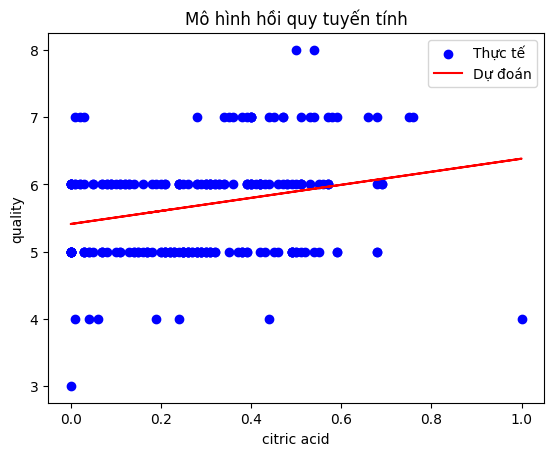

In [68]:
# Vẽ biểu đồ
plt.scatter(X_test, y_test, color='b', label='Thực tế')
plt.plot(X_test, y_pred, color='r', label='Dự đoán')
plt.xlabel('citric acid')
plt.ylabel('quality')
plt.legend()
plt.title('Mô hình hồi quy tuyến tính')
plt.show()

In [69]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 0.5703719784687079
R-squared (R^2): 0.06505135899982772


 Mô hình hồi quy tuyến tính giữa 'citric acid' và 'sulphates' và 'alcohol' và 'quality '

In [71]:
# Chọn thuộc tính đầu vào và đầu ra
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['quality']

# Tách tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Xác định chất lượng Mô hình hồi quy tuyến tính giữa 'citric acid' và 'sulphates' và 'alcohol' và 'quality '

In [72]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In kết quả
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.4800866110352162
MSE: 0.3679241847484391
R-squared: 0.3388283129191665


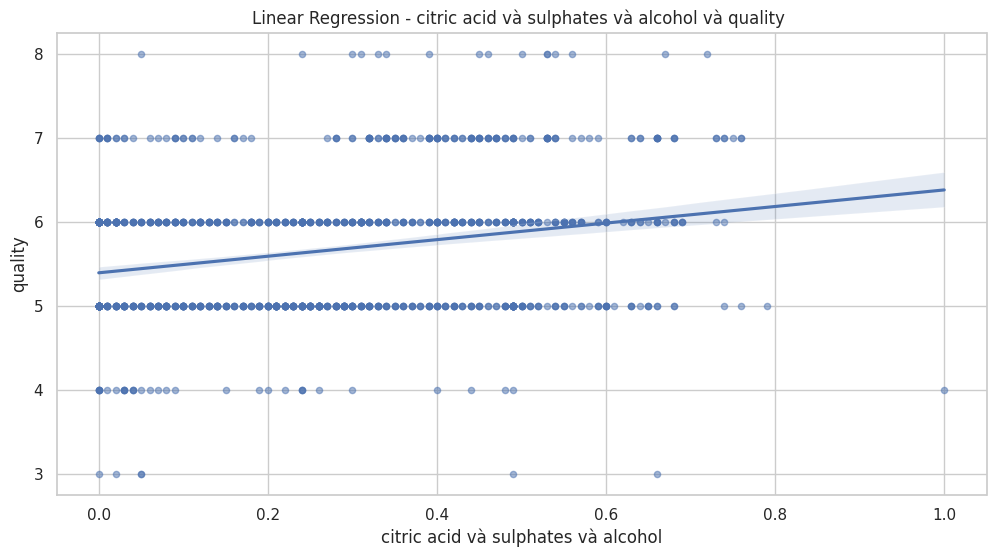

In [75]:
# Vẽ biểu đồ hồi quy tuyến tính
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Sử dụng seaborn để vẽ biểu đồ hồi quy tuyến tính
sns.regplot(x=X['citric acid'], y=y, scatter_kws={'s': 20, 'alpha': 0.5})

# Đặt tên cho trục
plt.title('Linear Regression - citric acid và sulphates và alcohol và quality ')
plt.xlabel('citric acid và sulphates và alcohol')
plt.ylabel('quality')

plt.show()

️🎯 Chọn các biến giải thích để cho mô hình có chất lượng tốt

Dựa vào các thông số MAE, MSE, R-squared có thể thấy mô hình có:


> X = 'citric acid', 'sulphates ', 'alcohol'

> y = 'quality'

---
> Có giá trị cao:






*  MAE: 0.4800866110352162
* MSE: 0.3679241847484391
*R-squared: 0.3388283129191665








#🎯Xây dựng mô hình cây quyết định

Mô hình cây quyết định giữa 'citric acid và quality

In [77]:

# Chọn biến độc lập và biến mục tiêu
X = data[['citric acid']]
y = data['quality']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Xây dựng mô hình cây quyết định
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = regressor.predict(X_test)

Xác định chất lượng mô hình cây quyết định giữa citric acid và quality

Mean Squared Error (MSE): 0.5566294154928398
R-squared (R^2): -0.0002811040319374847


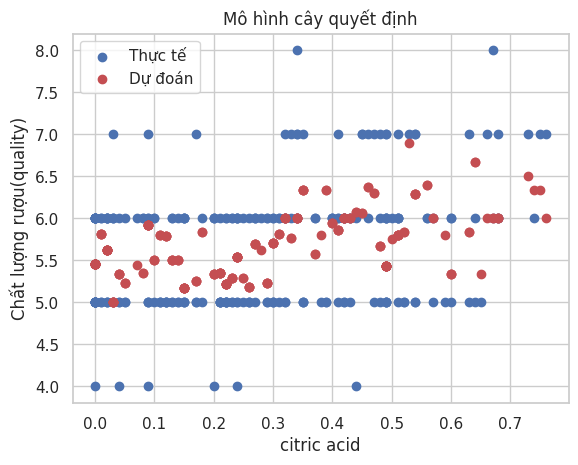

In [79]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

# Vẽ biểu đồ
plt.scatter(X_test['citric acid'], y_test, color='b', label='Thực tế')
plt.scatter(X_test['citric acid'], y_pred, color='r', label='Dự đoán')
plt.xlabel('citric acid')
plt.ylabel('Chất lượng rượu(quality)')
plt.legend()
plt.title('Mô hình cây quyết định')
plt.show()

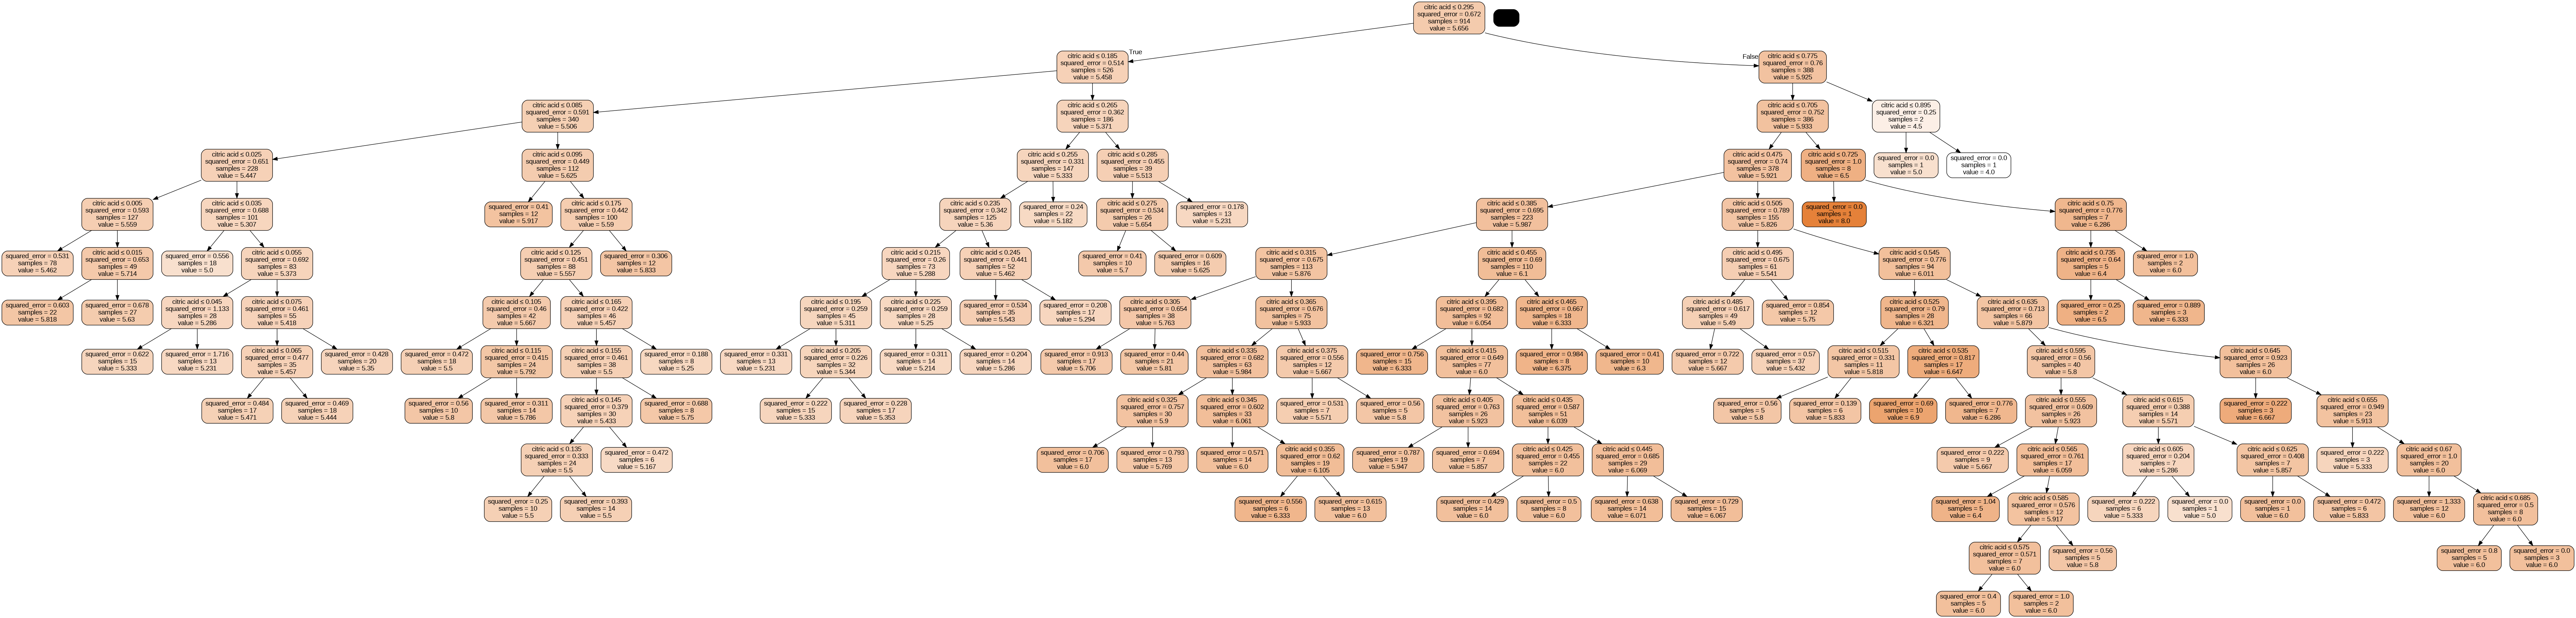

In [80]:
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Mô hình cây quyết định giữa 'citric acid và quality, sulphates,alcohol

In [82]:
X = df[['citric acid','sulphates','alcohol']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

In [84]:
X_train.shape

(914, 3)

In [88]:
dt = tree.DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

Xác định Mô hình cây quyết định giữa 'citric acid và quality, sulphates,alcohol

In [89]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Output the evaluation metrics
print(f"F1-Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy score: 0.58
F1-Score: 0.59
Recall: 0.58
Precision: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


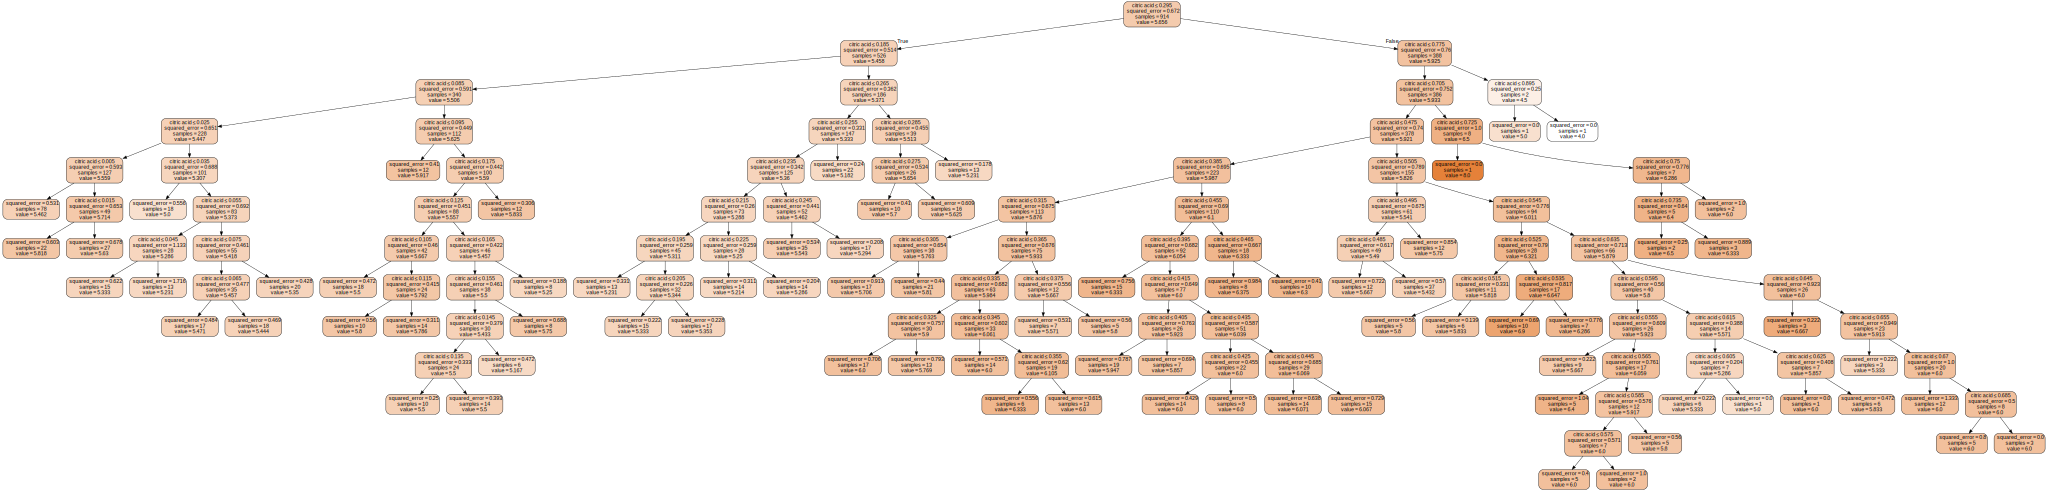

In [90]:
graph = graphviz.Source(dot_data)
graph

Chọn các biến  cho mô hình  có chất lượng tốt nhất
Các biến được chọn là
X = 'citric acid ', 'sulphates ', 'alcohol'
y = 'quality'.
Với các giá trị đánh giá:

Accuracy score: 0.58
F1-Score: 0.59
Recall: 0.58
Precision: 0.60


*   Accuracy score : 0.58 - Tỉ lệ phần trăm của dự đoán đúng trên tổng số dự đoán.
*   F1-Score: 0.59 - F1-Score là sự kết hợp giữa Precision và Recall. Giá trị này cũng khá tốt, với sự cân bằng giữa chính xác và bao quát.

*   Recall: 0.58 - Recall là tỷ lệ của các trường hợp dự đoán đúng trên tổng số trường hợp thực tế. Giá trị này cũng khá cao, đặc biệt nếu độ quan trọng của việc bắt những trường hợp dương là quan trọng trong bài toán.
*   
Precision: 0.60 - Precision là tỷ lệ của các trường hợp dự đoán đúng trên tổng số trường hợp dự đoán positive. Nó cũng khá tốt, chỉ ra rằng khi mô hình dự đoán positive, nó đưa ra dự đoán đúng một cách chính xác.








#🎯So sánh các mô hình

So sánh mô hình hồi quy và mô hình cây quyết định





*   X = citric acid,sulphates,alcohol
*   y = quality



In [91]:
# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train the decision tree model
dt_model = DecisionTreeRegressor(max_depth=25)
dt_model.fit(X_train, y_train)

# Evaluate the performance of the models on the testing set
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)

dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)

# Print the evaluation metrics
print("Linear Regression Model:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"R^2: {lr_r2:.2f}")

print("\nDecision Tree Model:")
print(f"MAE: {dt_mae:.2f}")
print(f"MSE: {dt_mse:.2f}")
print(f"R^2: {dt_r2:.2f}")

Linear Regression Model:
MAE: 0.48
MSE: 0.37
R^2: 0.34

Decision Tree Model:
MAE: 0.46
MSE: 0.59
R^2: -0.06


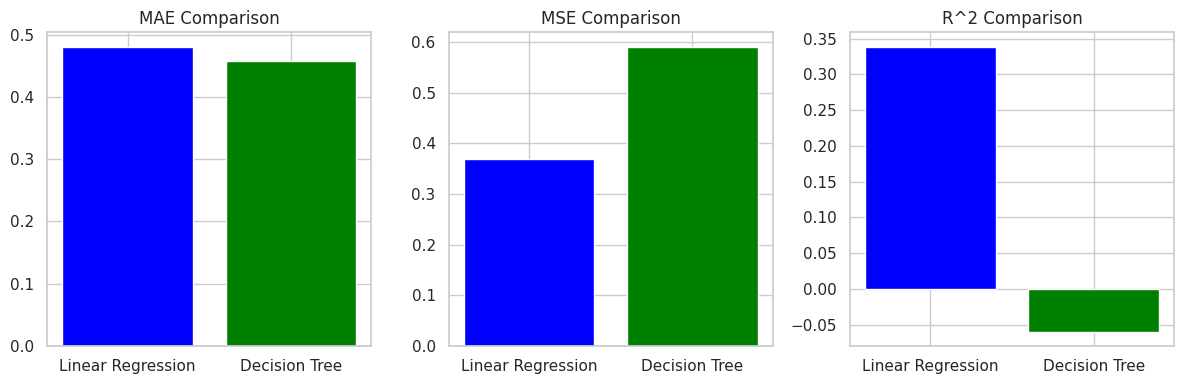

In [95]:
# Tên của các mô hình
model_names = ['Linear Regression', 'Decision Tree']

# Giá trị MAE, MSE, R^2
mae_values = [lr_mae, dt_mae]
mse_values = [lr_mse, dt_mse]
r2_values = [lr_r2, dt_r2]

# Biểu đồ so sánh MAE
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(model_names, mae_values, color=['blue', 'green'])
plt.title('MAE Comparison')

# Biểu đồ so sánh MSE
plt.subplot(1, 3, 2)
plt.bar(model_names, mse_values, color=['blue', 'green'])
plt.title('MSE Comparison')

# Biểu đồ so sánh R^2
plt.subplot(1, 3, 3)
plt.bar(model_names, r2_values, color=['blue', 'green'])
plt.title('R^2 Comparison')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

🎯kết luận
️



*   Với các thông số R^2 và MSE, ta thấy mô hình cây quyết định và hồi quy tuyến tính có chỉ số R^2 hơi chênh lệch , có sự khác biệt nhỏ MSE,MAE giữa 2 mô hình Nếu MSE,MAE càng nhỏ sẽ cho ra mô hình tốt hơn nên mô hình cây quyết định sẽ phù hợp cho trường hợp này.


